# ENCUESTA NACIONAL DE EMPLEO - ENE
## Analisis trimestral  - 2018 - 02


### DataSet
http://www.ine.cl/estadisticas/laborales/ene/base-de-datos
- Original data on SPSS (.SAV) format converted to .CSV using "R"

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!ls *.csv

ENE_2018_01_DEF.csv ENE_2018_02_EFM.csv ENE_2018_03_FMA.csv ENE_2018_04_MAM.csv


In [4]:
# Load dataset
df = pd.read_csv('ENE_2018_02_EFM.csv', error_bad_lines=False, warn_bad_lines=False)
df.shape # (81716, 137)

(81716, 137)

In [5]:
df.head()

,id_directorio,id_identificacion,region,r_p_c,ano_trimestre,mes_central,ano_encuesta,mes_encuesta,estrato,tipo,...,cae_general,cae_especifico,categoria_ocupacion,habituales,efectivas,cine,fact,r_p_rev4cl_caenes,sector,ocup_form
1,21928,248756,Maule,Río Claro,2018,Enero-Marzo,2018,Febrero,7069,Rural,...,Inactivos que estuvieron disponibles para trab...,Otras razones (Potencial),No corresponde,NaN,NaN,Educación secundaria,327.089,NaN,0,0
4,21928,248762,Maule,Río Claro,2018,Enero-Marzo,2018,Febrero,7069,Rural,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de pensión o montepiado (Habitual),No corresponde,NaN,NaN,Educación primaria (nivel 1),330.256,NaN,0,0
5,11076,249512,Maule,Linares,2018,Enero-Marzo,2018,Febrero,7071,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de pensión o montepiado (Habitual),No corresponde,NaN,NaN,Educación primaria (nivel 1),62.5406,NaN,0,0
9,11076,243333,Maule,Linares,2018,Enero-Marzo,2018,Febrero,7071,CD,...,Menor de quince años,Menor de quince años,No corresponde,NaN,NaN,Educación preescolar,64.0397,NaN,0,0
10,11076,243333,Maule,Linares,2018,Enero-Marzo,2018,Febrero,7071,CD,...,Menor de quince años,Menor de quince años,No corresponde,NaN,NaN,Educación preescolar,64.0397,NaN,0,0


### Viewing dataset

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81716 entries, 1 to 102713
Data columns (total 137 columns):
id_directorio          int64
id_identificacion      int64
region                 object
r_p_c                  object
ano_trimestre          int64
mes_central            object
ano_encuesta           int64
mes_encuesta           object
estrato                int64
tipo                   object
hogar                  int64
nro_linea              int64
edad                   int64
parentesco             object
sexo                   object
curso                  object
nivel                  object
termino_nivel          object
est_conyugal           object
proveedor              object
nacionalidad           object
a1                     object
a2                     object
a3                     object
a4                     object
a5                     object
a6                     object
a6_otro                object
a7                     object
a8                     obje

In [7]:
for col in df:
    print ('\n', col)
    print (df[col].unique())


 id_directorio
[21928 11076 22527 ... 16796  5185 18404]

 id_identificacion
[248756 248762 249512 ... 248736 248750 248752]

 region
['Maule' 'Biobío' 'La Araucanía' 'Los Lagos' 'Aysén' 'Magallanes'
 'Metropolitana' 'Los Ríos' 'Arica y Parinacota' 'Tarapacá' 'Antofagasta'
 'Atacama' 'Coquimbo' 'Valparaíso' 'O´Higgins']

 r_p_c
['Río Claro' 'Linares' 'Colbún' 'Parral' 'San Javier' 'Longaví'
 'Cauquenes' 'Chanco' 'Pelluhue' 'Chillán' 'Quirihue' 'Bulnes'
 'San Carlos' 'Portezuelo' 'San Ignacio' 'Concepción' 'Talcahuano' 'Penco'
 'Lota' 'Coronel' 'Hualqui' 'Tomé' 'Santa Juana' 'Florida' 'Arauco'
 'Curanilahue' 'Los Alamos' 'Lebu' 'Cañete' 'Los Ángeles' 'Nacimiento'
 'Negrete' 'Laja' 'Antuco' 'Cabrero' 'Chillán Viejo' 'Chiguayante'
 'San Pedro de la Paz' 'Hualpén' 'Renaico' 'Traiguén' 'Victoria'
 'Collipulli' 'Curacautín' 'Angol' 'Lonquimay' 'Temuco' 'Pucón' 'Gorbea'
 'Freire' 'Galvarino' 'Villarrica' 'Loncoche' 'Carahue' 'Cunco'
 'Padre Las Casas' 'Osorno' 'Puerto Octay' 'Río Negro' 'San


 b16
[nan 'Menos de 5' '1' '2' '5' '3' '4' '9' '6' 'No sabe'
 'Actividades de los hogares como empleadores; actividades no diferenciadas de los hogares como productores de bienes y se'
 'Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas'
 'Enseñanza' ' silvicultura y pesca'
 'Administración pública y defensa; planes de seguridad social de afiliación obligatoria'
 'Agricultura' 'Industrias manufactureras'
 'Actividades de alojamiento y de servicio de comidas'
 'Actividades artísticas' 'De 5 a 10 personas' 'Construcción'
 'Otras actividades de servicios'
 'Actividades de atención de la salud humana y de asistencia social'
 'Explotación de minas y canteras' 'Actividades profesionales'
 'Transporte y almacenamiento' 'Suministro de electricidad'
 'Actividades inmobiliarias'
 'Actividades de servicios administrativos y de apoyo'
 'Actividades financieras y de seguros' 'Información y comunicaciones'
 'Sí' 'Suministro de agua; evacuación de aguas residua

['                                                                                                                                                                                                                                                               '
 'POR  TRASLADO                                                                                                                                                                                                                                                  '
 'SE  RETIRO                                                                                                                                                                                                                                                     '
 'POR TRASLADO                                                                                                                                                                                                                 


 fact
[327.088937 330.25558039 62.54059029999999 ... '330.25558039' '327.088937'
 '278.80113466']

 r_p_rev4cl_caenes
[nan 'Educación secundaria' '36.08854547' ... '295.1086404' '263.45376445'
 '327.088937']

 sector
[0 '36.08854547' '0' ... '263.45376445' '283.38059479' '272.70938668']

 ocup_form
[0 'Industrias manufactureras' '0' ... '275.34956578' '272.70938668'
 '330.25558039']


### DataSet general overview:
- Columns up to "nacionalidad" are social-economic data regarding samples
- Columns from 'a_n' to 'e_n' are data collect from questionary's answers
- Column "cae_general" seems to be the "conclusion" regarding why a person is not ocupied

In [8]:
df.cae_general.value_counts()

Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar                                                                                                                                                                                          20999
Menor de quince años                                                                                                                                                                                                                                               19585
                                                                                                                                                                                                                                                                    4465
 faena                                                                                                                                                                                                       

In [9]:
df.region.value_counts()
# 15 regions

Metropolitana         18966
Valparaíso            12890
Biobío                10516
O´Higgins              5290
Maule                  5158
Coquimbo               4836
Los Lagos              4554
La Araucanía           4088
Arica y Parinacota     2869
Tarapacá               2741
Antofagasta            2736
Atacama                2348
Los Ríos               2198
Aysén                  1589
Magallanes              937
Name: region, dtype: int64

In [10]:
df.r_p_c.value_counts().head()
# 276 cities

Arica           2856
Valparaíso      1676
San Bernardo    1614
Iquique         1548
Concepción      1535
Name: r_p_c, dtype: int64

In [11]:
df.mes_encuesta.value_counts()

Enero      31248
Marzo      29077
Febrero    21391
Name: mes_encuesta, dtype: int64

### Numerical Analysis

In [12]:
POP = len(df.edad)
print ("Total Population:", POP, '\n')

Total Population: 81716 



In [13]:
df.edad.describe()

count    81716.000000
mean        36.428313
std         24.166189
min          0.000000
25%         15.000000
50%         34.000000
75%         56.000000
max        106.000000
Name: edad, dtype: float64

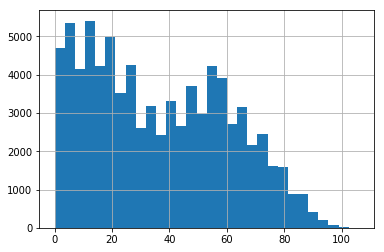

In [14]:
df.edad.hist(bins=30)

In [15]:
df_15 = df[df.edad >=15]
PET = len(df_15)
print ("Total Chilean Population over 15 years (PET):", PET, '\n')

Total Chilean Population over 15 years (PET): 62131 



In [16]:
print ("Pop potential over total: {}% \n".format(round(PET/POP, 2)*100))

Pop potential over total: 76.0% 



### Working with Questionary

<img src="Sit_Lab.png">

Main Questions:
- Question A1:  Did you work at least 1 hour last week?
- Question A2:  Did you make any deal that resulted as work?
- Question A3:  Will you make money with this work?
- Question A5:  Even if not worked, did yoy have any other paid activity?
- Question E1:  Did you try to get a work on the last 12 months?
- Question E2:  Did you try to get a work on the last 4 weeks?

In [17]:
df_ocupados = df_15[df_15.a1 == 'Sí']
df_ocupados.shape

(22618, 137)

In [18]:
df_ocupados = df_ocupados[df_ocupados.a3 == 'Sí']
df_ocupados.shape

(22340, 137)

In [19]:
df_not_ocup = df_15[df_15.a1 == 'No']
df_not_ocup.shape

(36607, 137)

In [20]:
df_not_ocup = df_not_ocup[df_not_ocup.a2 == 'No']
df_not_ocup.shape

(35962, 137)

In [21]:
df_ocup_aus = df_not_ocup[df_not_ocup.a5 == 'Sí']
df_ocup_aus.shape

(3011, 137)

In [22]:
r = 'Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar'
df_inativos = df_15[df_15.cae_general == r]
df_inativos.shape

(20999, 137)

In [23]:
r = 'Inactivos que estuvieron disponibles para trabajar'
df_desocupados = df_15[df_15.cae_general == r]
df_desocupados.shape

(2553, 137)

In [24]:
r = 'Cesante'
df_cesantes = df_15[df_15.cae_general == r]
df_cesantes.shape

(925, 137)

In [25]:
POP_OCUP = len(df_ocupados) + len(df_ocup_aus)
print ("Total Chilean Population over 15 years working:", POP_OCUP)

Total Chilean Population over 15 years working: 25351


In [26]:
POP_INAT = len(df_inativos) +len(df_cesantes)
print ("Total Chilean Population over 15 years Inactive :", POP_INAT)

Total Chilean Population over 15 years Inactive : 21924


In [27]:
PEA = PET - POP_INAT
print ("Total Chilean Population Economic active:", PEA)

Total Chilean Population Economic active: 40207


In [28]:
POP_DESOCUP = len(df_desocupados)
print ("Total Chilean Population over 15 years w/o job:", POP_DESOCUP)

Total Chilean Population over 15 years w/o job: 2553


In [29]:
TD = POP_DESOCUP/POP_OCUP
print ("Tasa de Desempleo: {}% \n".format(round(TD, 3)*100))

Tasa de Desempleo: 10.100000000000001% 



### Regional Analysis

In [30]:
df.region.value_counts()
# 15 regions

Metropolitana         18966
Valparaíso            12890
Biobío                10516
O´Higgins              5290
Maule                  5158
Coquimbo               4836
Los Lagos              4554
La Araucanía           4088
Arica y Parinacota     2869
Tarapacá               2741
Antofagasta            2736
Atacama                2348
Los Ríos               2198
Aysén                  1589
Magallanes              937
Name: region, dtype: int64

In [31]:
REGION = 'Metropolitana'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Metropolitana

Regional Population over 15 years working: 6123
Regional Population over 15 years w/o job:  650
Tasa de Desempleo Regional:                10.6%


In [32]:
REGION = 'Atacama'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Atacama

Regional Population over 15 years working: 720
Regional Population over 15 years w/o job:  81
Tasa de Desempleo Regional:                11.3%


In [33]:
REGION = 'Los Lagos'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Los Lagos

Regional Population over 15 years working: 1316
Regional Population over 15 years w/o job:  94
Tasa de Desempleo Regional:                7.1%
